# Variational Auto-Encoder

Implementing a VAE in TensorFlow. Doing this to understand VAEs better so I can then figure out VRNNs and then VRADA.

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from mnist import MNIST # pip install --user python-mnist
from urllib.parse import urlparse
from urllib.request import urlretrieve
%matplotlib inline
layers = tf.contrib.layers
framework = tf.contrib.framework

Download and load the dataset.

In [6]:
files = [
    "http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz",
    "http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz",
    "http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz",
    "http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz"
]

def download(url, fn, force=False):
    if force or not os.path.exists(fn):
        urlretrieve(url, fn)
        print("Downloaded", fn)
    else:
        print("Already downloaded", fn)

for f in files:
    download(f, os.path.basename(urlparse(f).path))

Already downloaded train-images-idx3-ubyte.gz
Already downloaded train-labels-idx1-ubyte.gz
Already downloaded t10k-images-idx3-ubyte.gz
Already downloaded t10k-labels-idx1-ubyte.gz


In [7]:
mndata = MNIST('.', return_type='numpy', gz=True)
train_images, train_labels = mndata.load_training()
test_images, test_labels = mndata.load_testing()
assert train_images.shape[0] == train_labels.shape[0]
assert test_images.shape[0] == test_labels.shape[0]

Reshape the 60,000 784x1 images to 60,000 28x28 images and normalize.

In [8]:
train_images = (train_images.reshape(-1,28,28,1).astype(np.float32) - 128.0) / 128.0
test_images = (test_images.reshape(-1,28,28,1).astype(np.float32) - 128.0) / 128.0

Visualize digits.

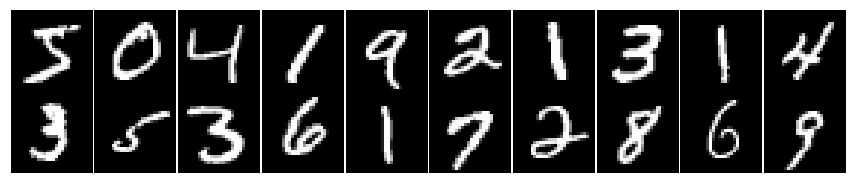

In [5]:
def show(images, num=20, cols=10):
    fig = plt.figure(figsize=(15,3))
    fig.subplots_adjust(wspace=0, hspace=0)
    for i in range(num):
        ax = fig.add_subplot(np.ceil(num/cols), cols, i+1)
        ax.grid(False); ax.set_yticks([]); ax.set_xticks([]); plt.axis('off')
        plt.imshow(np.squeeze(images[i]), cmap='gray')
    plt.show()

show(train_images)

## VAE